# SHAPE

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from eden.util import configure_logging
import logging
configure_logging(logging.getLogger(),verbosity=3)

from IPython.core.display import HTML
HTML('<style>.container { width:95% !important; }</style><style>.output_png {display: table-cell;text-align: center;vertical-align: middle;}</style>')

In [ ]:
import simushape  as ss
import numpy as np
# the plan is to write my predictions in a react file
if False:
    data = ss.get_all_data('data/RNA16.react','data/RNA16.dbn')
    res=[]
    for e in data.keys(): 
        train = data.keys()
        train.remove(e)
        model = ss.make_model(data,train,False,3,3)
        graph = ss.eden_rna.sequence_dotbracket_to_graph(data[e][1],data[e][2])
        my_react = np.array(ss.predict(model,graph))
        res.append(">%s"%e)
        res.append('\n'.join(["%s\t%.4f" % (i,e) for i,e in enumerate(my_react)]))
        res.append('')

    with open("data/shaker_prediction.react",'w') as f: f.write('\n'.join(res))


# DRAW FUNCTION FOR THE SHAPE DATA

data for 'tRNA-asp' is corrupted, ignoring...
rna name ADDRSW


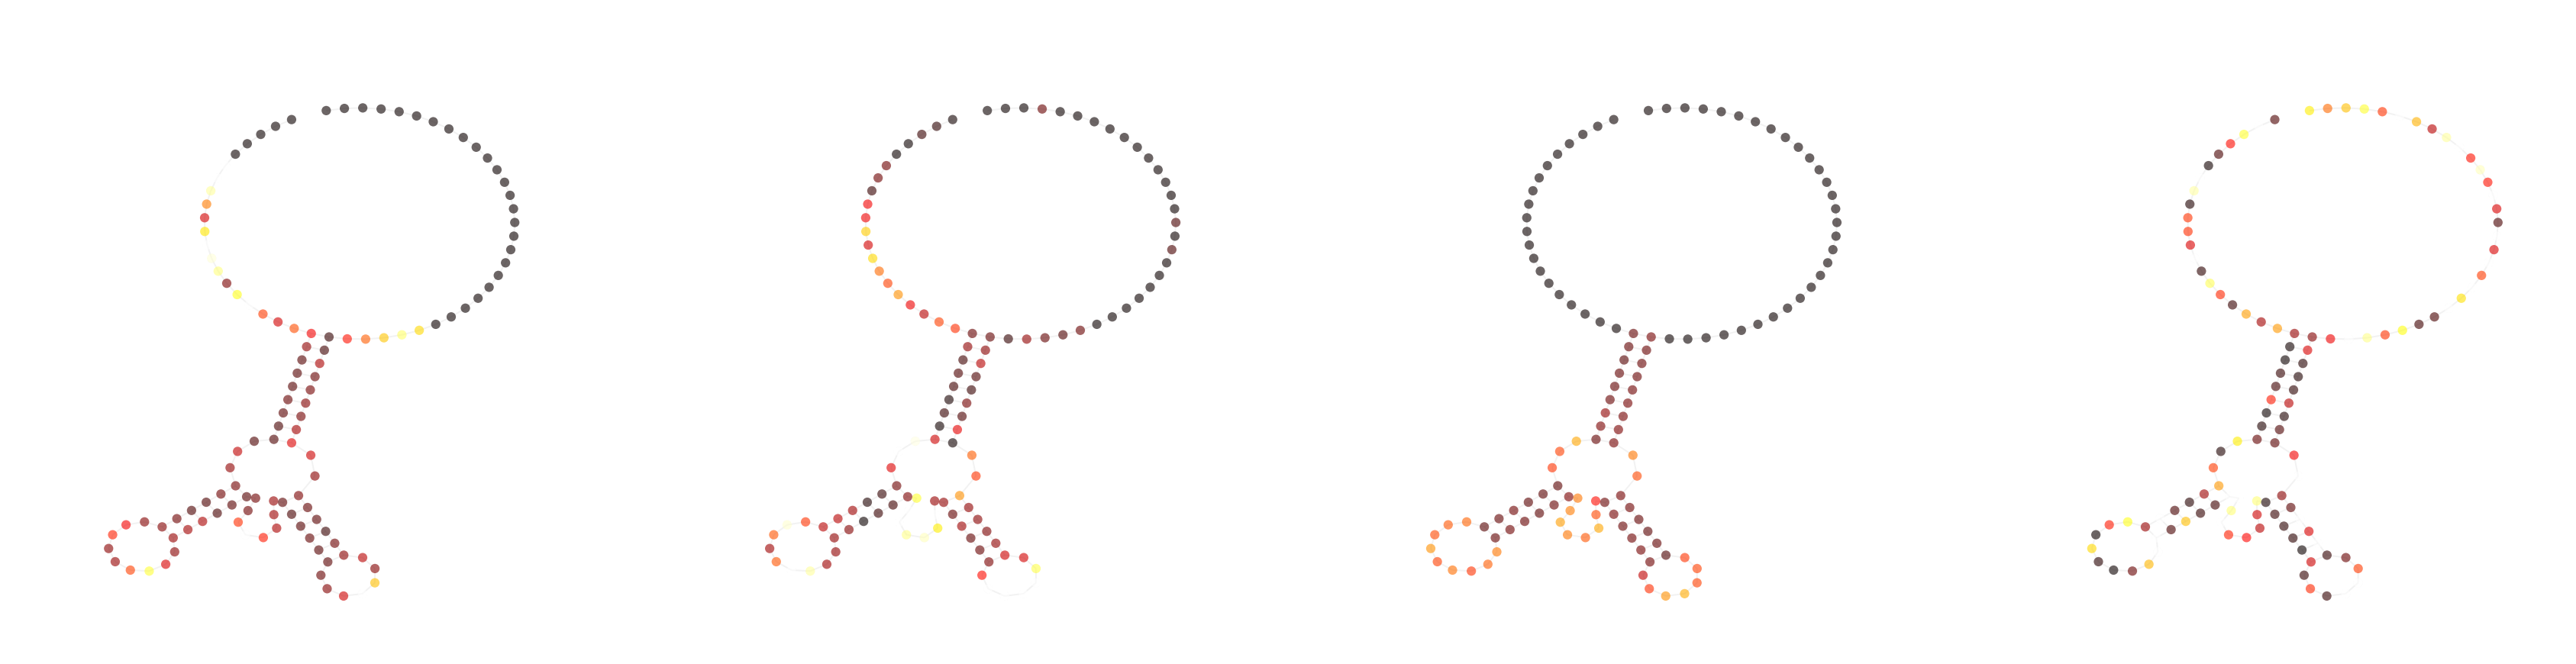

shaler: pearson: 0.154 spearman 0.402 variances: 0.215 1.243
hlmer: pearson: -0.390 spearman -0.157 variances: 0.215 171232.592
sukosd: pearson: 0.037 spearman 0.249 variances: 0.215 1.190
rna name GLYCFN


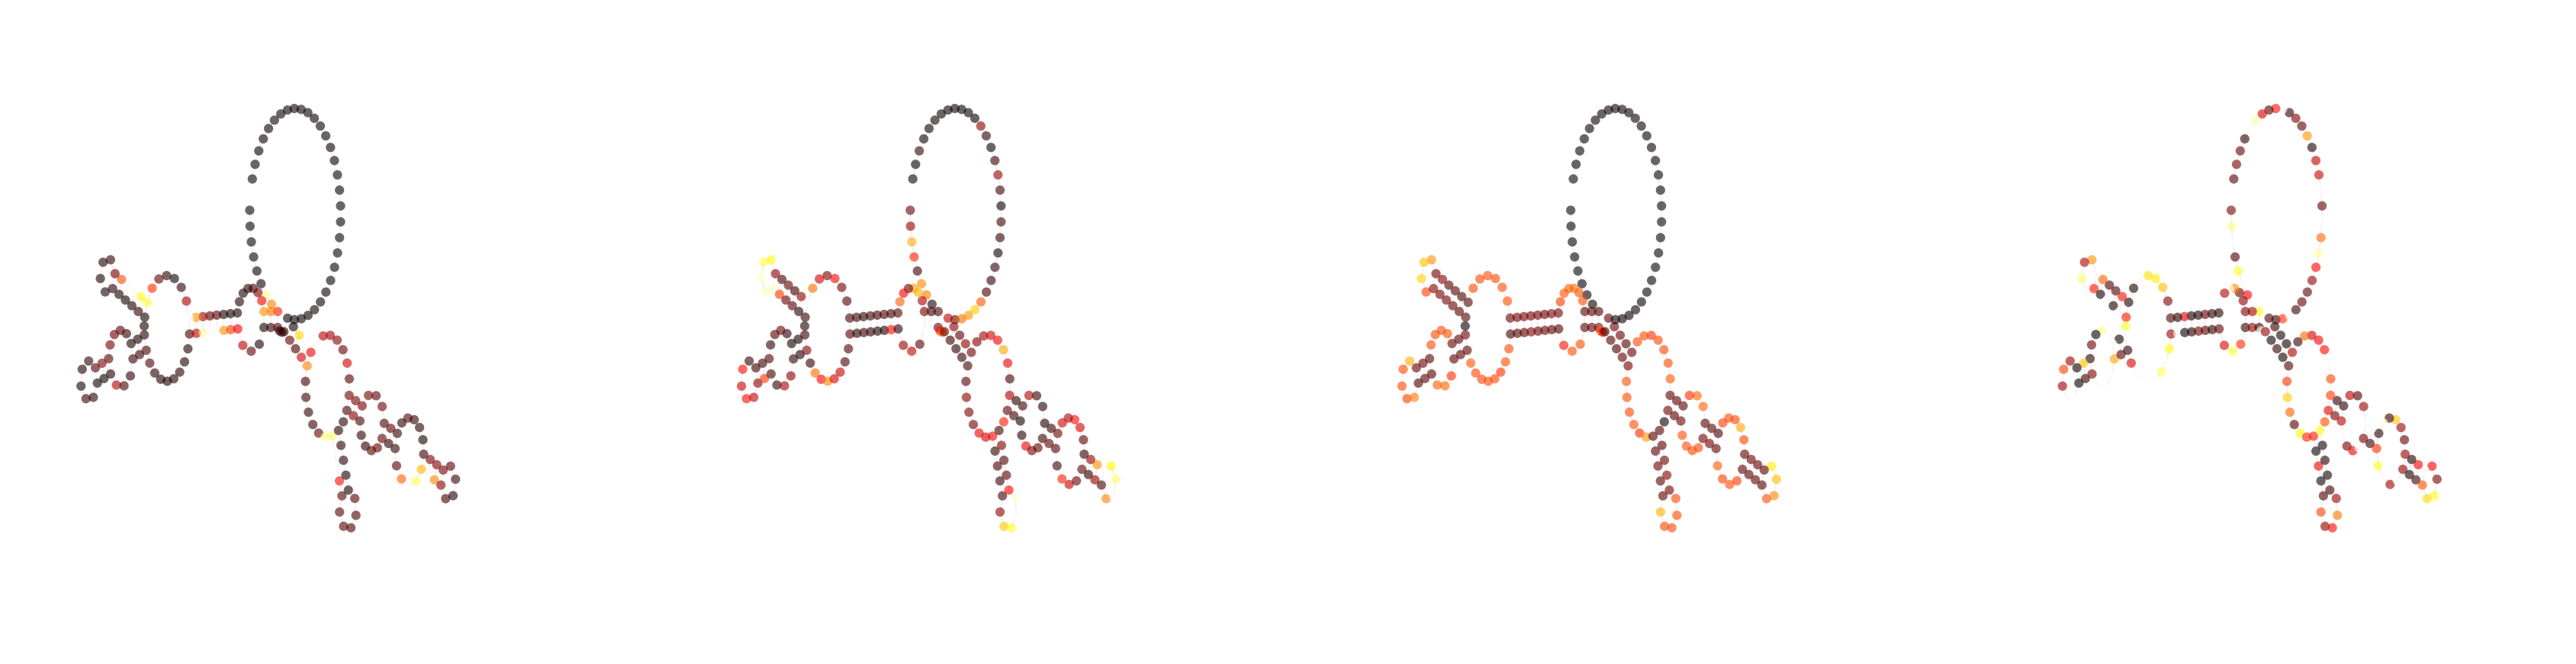

shaler: pearson: -0.155 spearman -0.179 variances: 0.133 0.077
hlmer: pearson: -0.058 spearman -0.224 variances: 0.133 23346.035
sukosd: pearson: -0.190 spearman -0.211 variances: 0.133 0.910
rna name tRNAphe


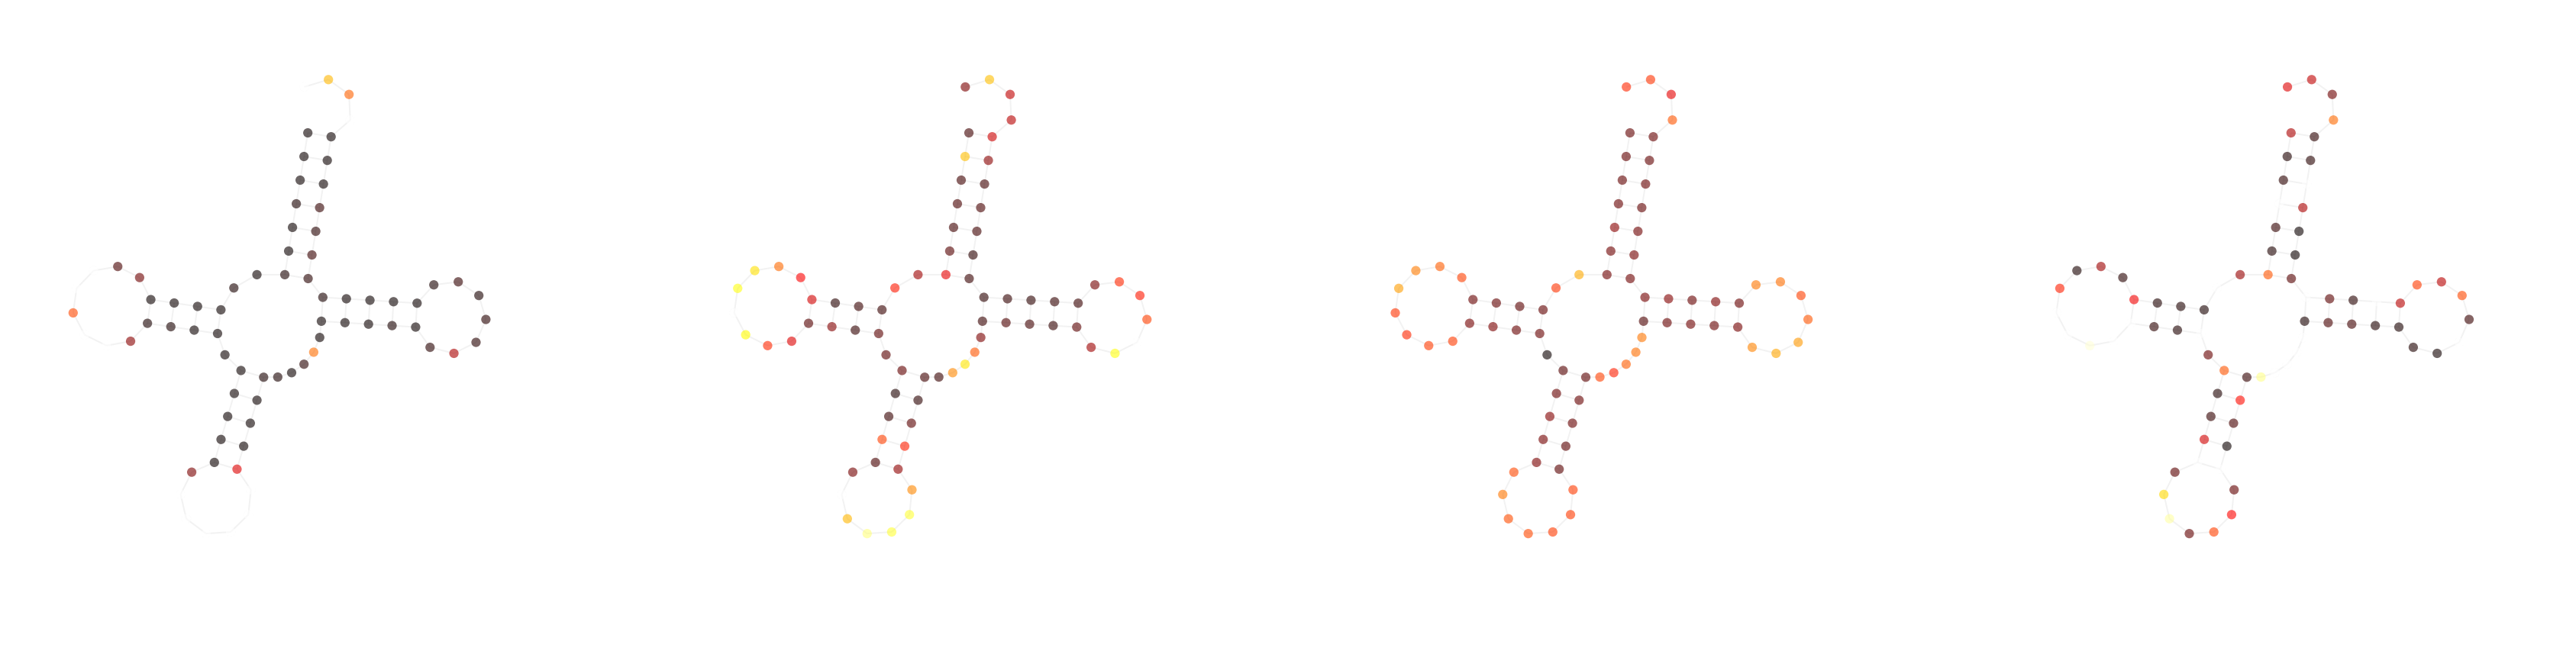

shaler: pearson: 0.484 spearman 0.612 variances: 0.844 0.101
hlmer: pearson: 0.053 spearman 0.611 variances: 0.844 12966.519
sukosd: pearson: -0.005 spearman 0.259 variances: 0.844 0.759
rna name RNAsep


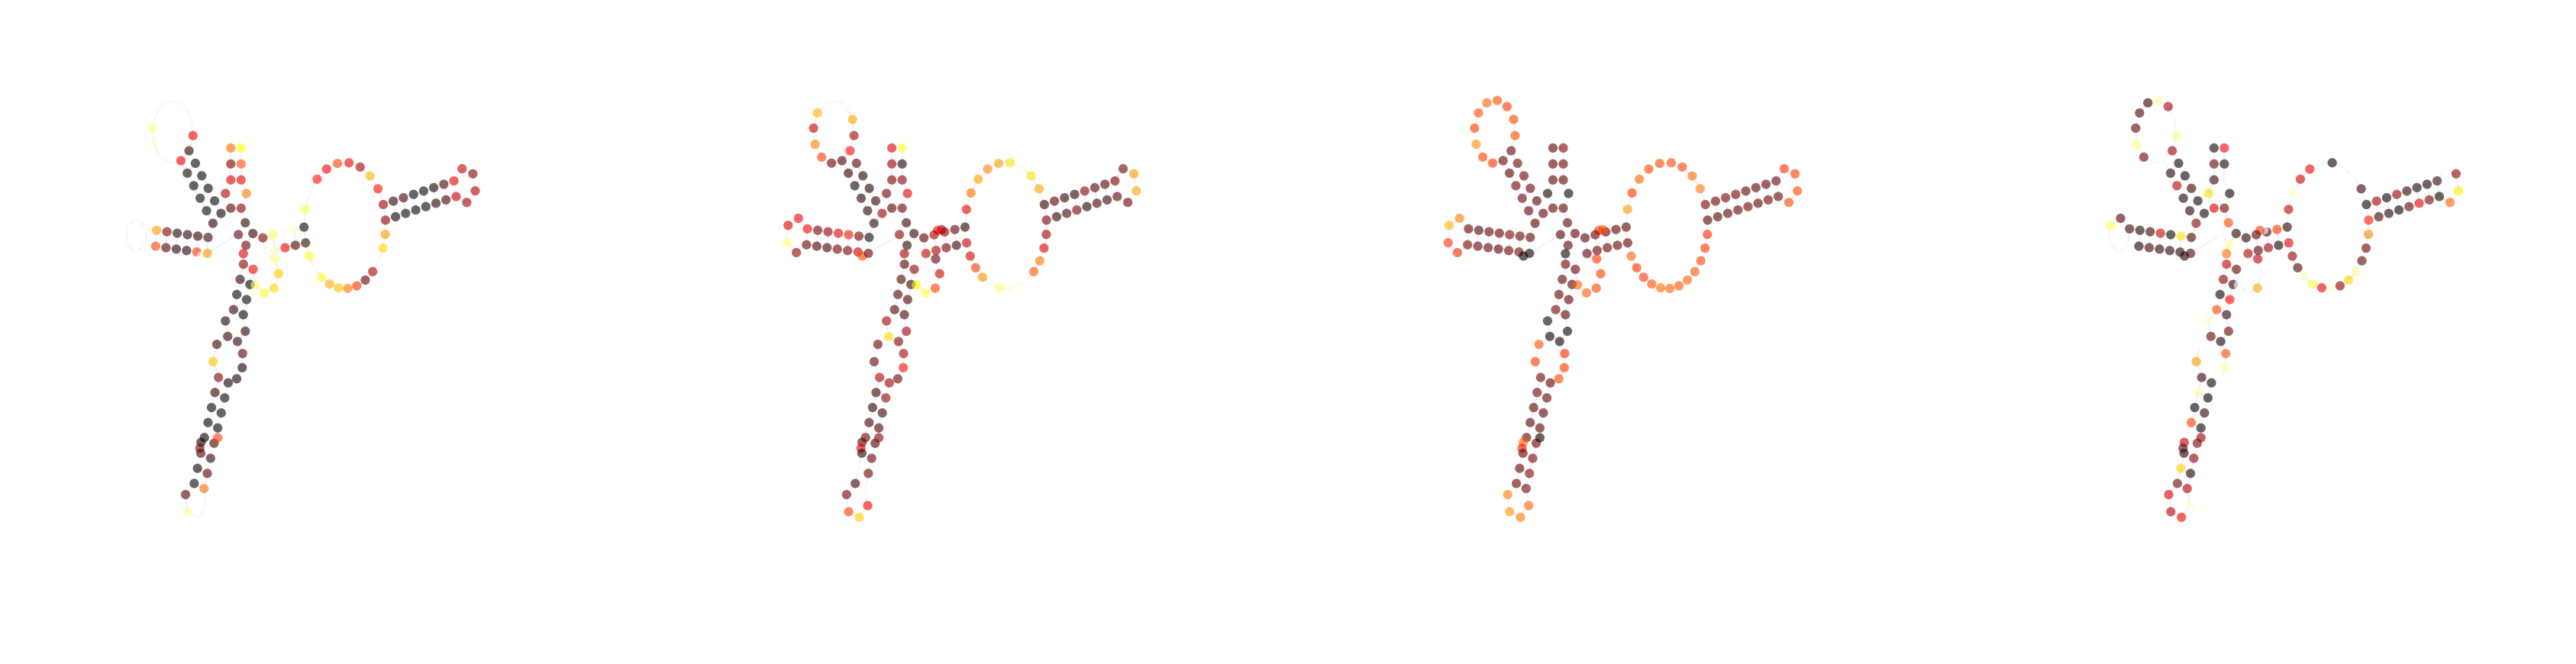

shaler: pearson: 0.298 spearman 0.609 variances: 1.017 0.094
hlmer: pearson: 0.039 spearman 0.486 variances: 1.017 60630.444
sukosd: pearson: 0.202 spearman 0.354 variances: 1.017 0.554
rna name ZHCV


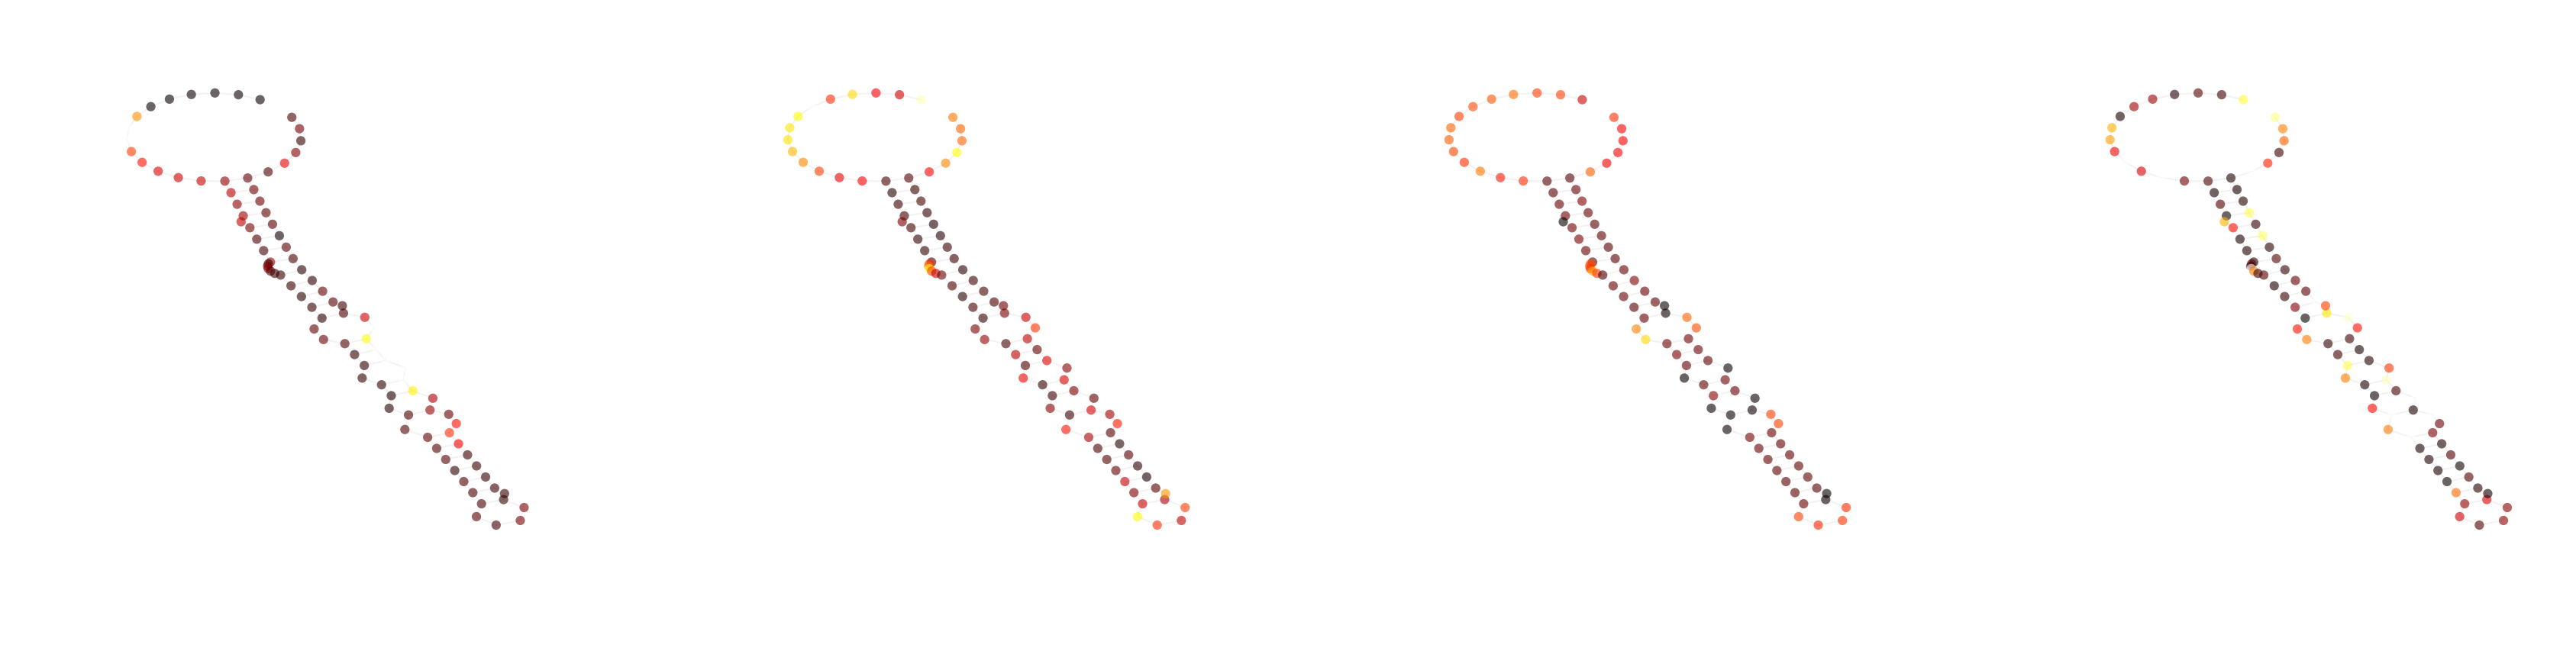

shaler: pearson: 0.217 spearman 0.367 variances: 0.190 0.042
hlmer: pearson: 0.009 spearman 0.279 variances: 0.190 116479.332
sukosd: pearson: -0.005 spearman 0.147 variances: 0.190 0.773
rna name Z-CIDGMP-1


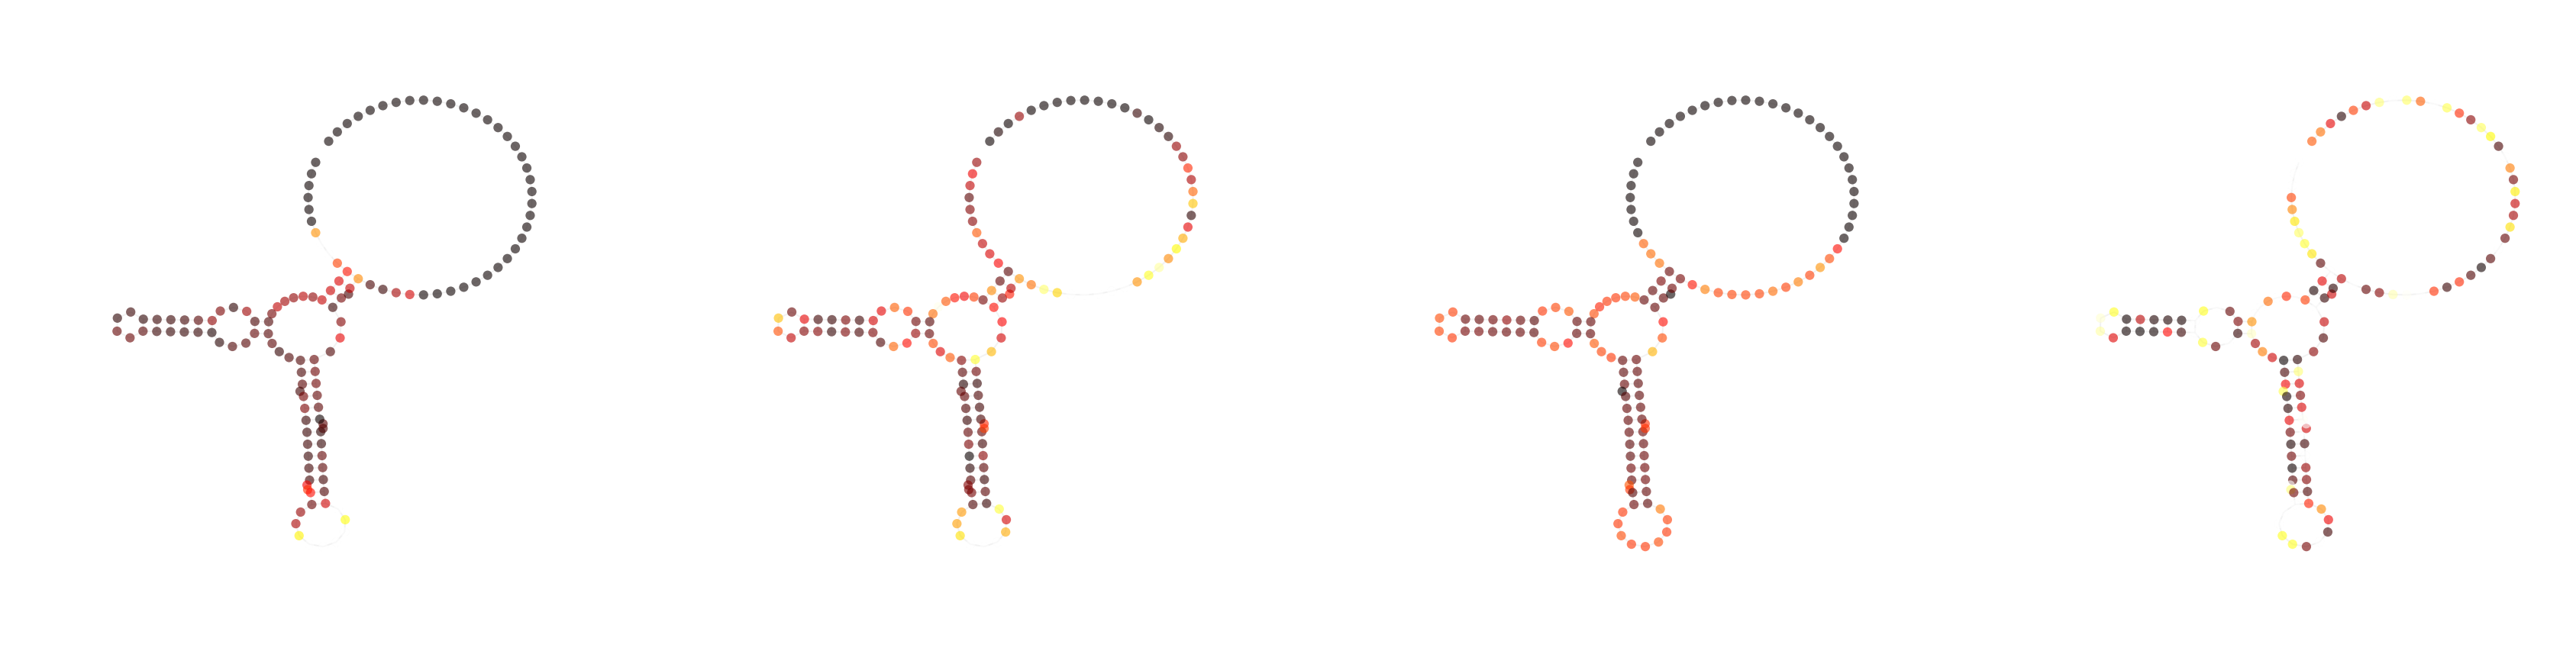

shaler: pearson: 0.596 spearman 0.425 variances: 0.180 0.091
hlmer: pearson: 0.011 spearman 0.286 variances: 0.180 30537.993
sukosd: pearson: 0.030 spearman 0.163 variances: 0.180 1.569
rna name adenin


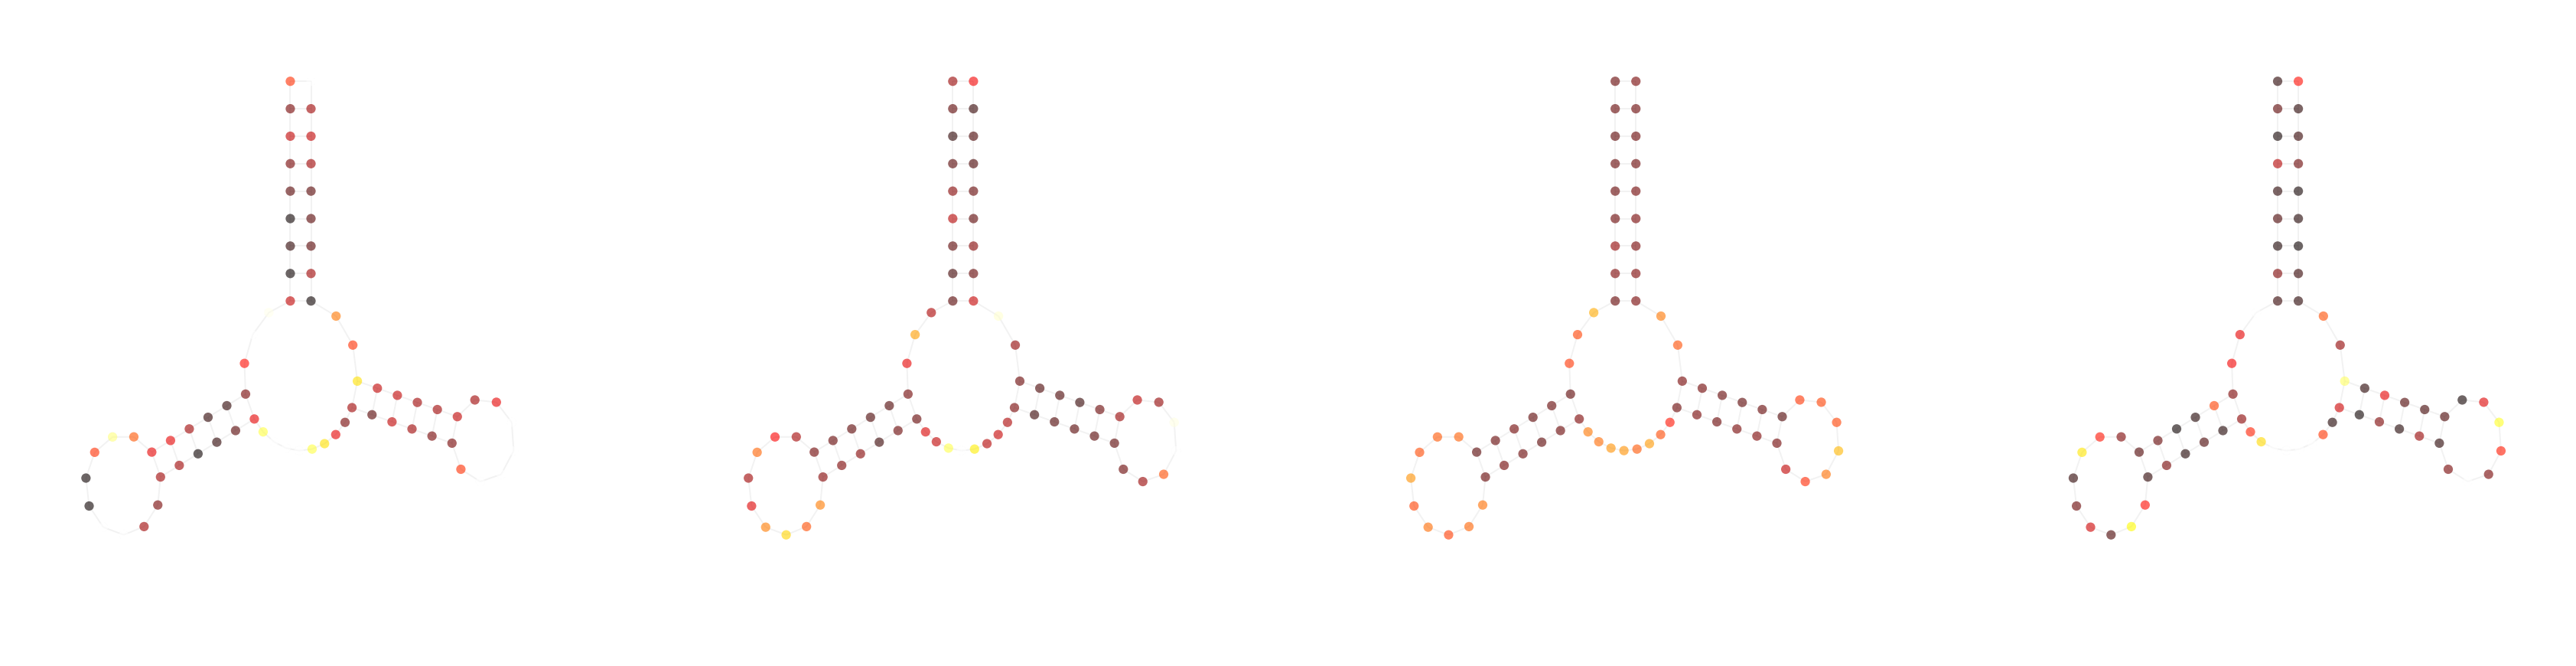

shaler: pearson: 0.398 spearman 0.530 variances: 3.075 0.170
hlmer: pearson: 0.458 spearman 0.486 variances: 3.075 0.033
sukosd: pearson: 0.376 spearman 0.638 variances: 3.075 0.176
rna name 23sRNA


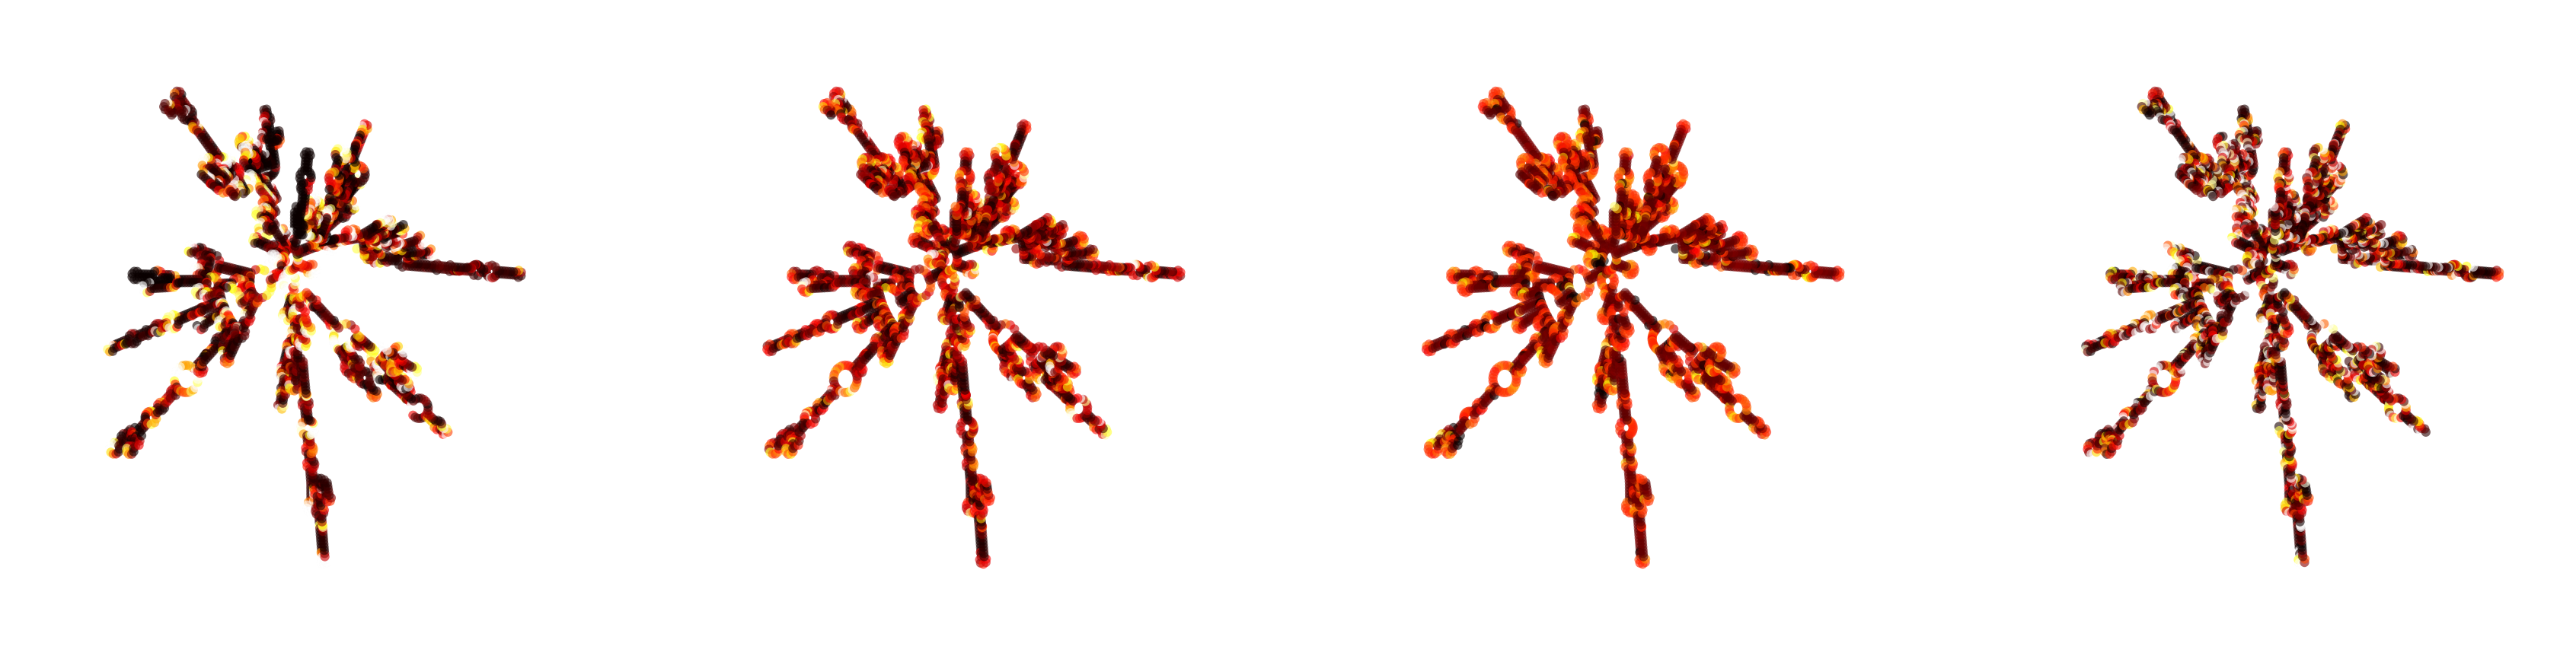

shaler: pearson: 0.291 spearman 0.439 variances: 0.391 0.064
hlmer: pearson: -0.001 spearman 0.384 variances: 0.391 42014.241
sukosd: pearson: 0.140 spearman 0.289 variances: 0.391 0.534
rna name p564


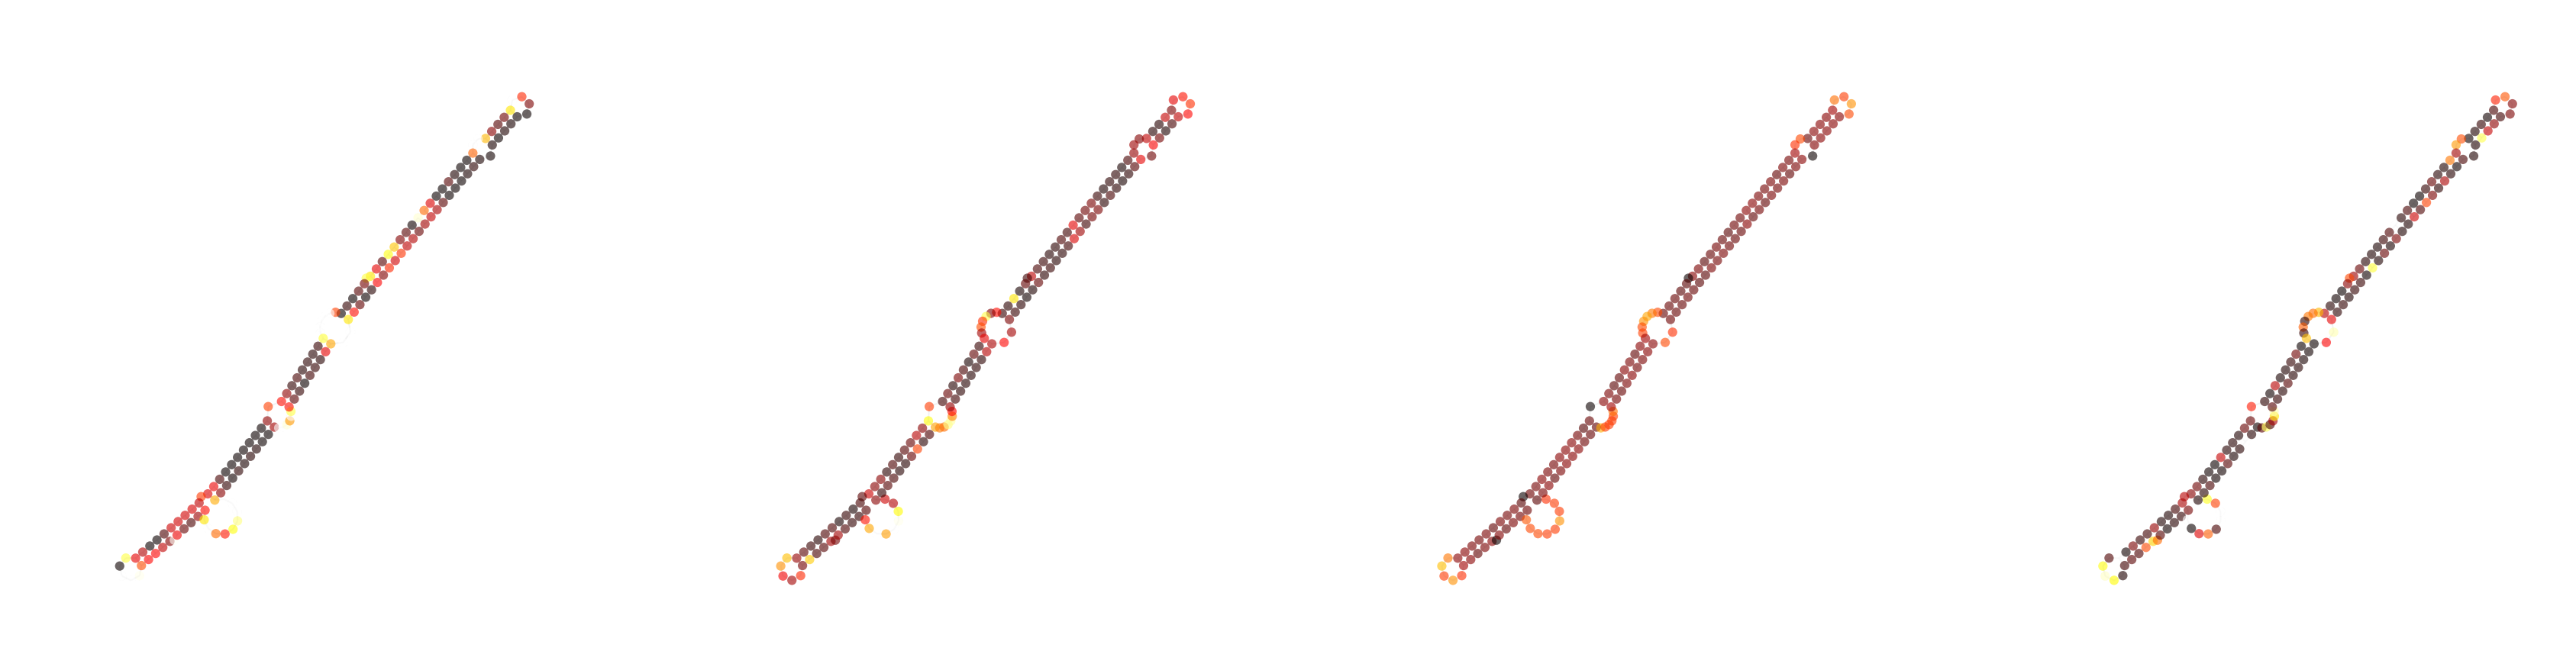

shaler: pearson: 0.422 spearman 0.496 variances: 0.302 0.051
hlmer: pearson: -0.041 spearman 0.418 variances: 0.302 31170.007
sukosd: pearson: 0.181 spearman 0.345 variances: 0.302 0.327
rna name srRNA


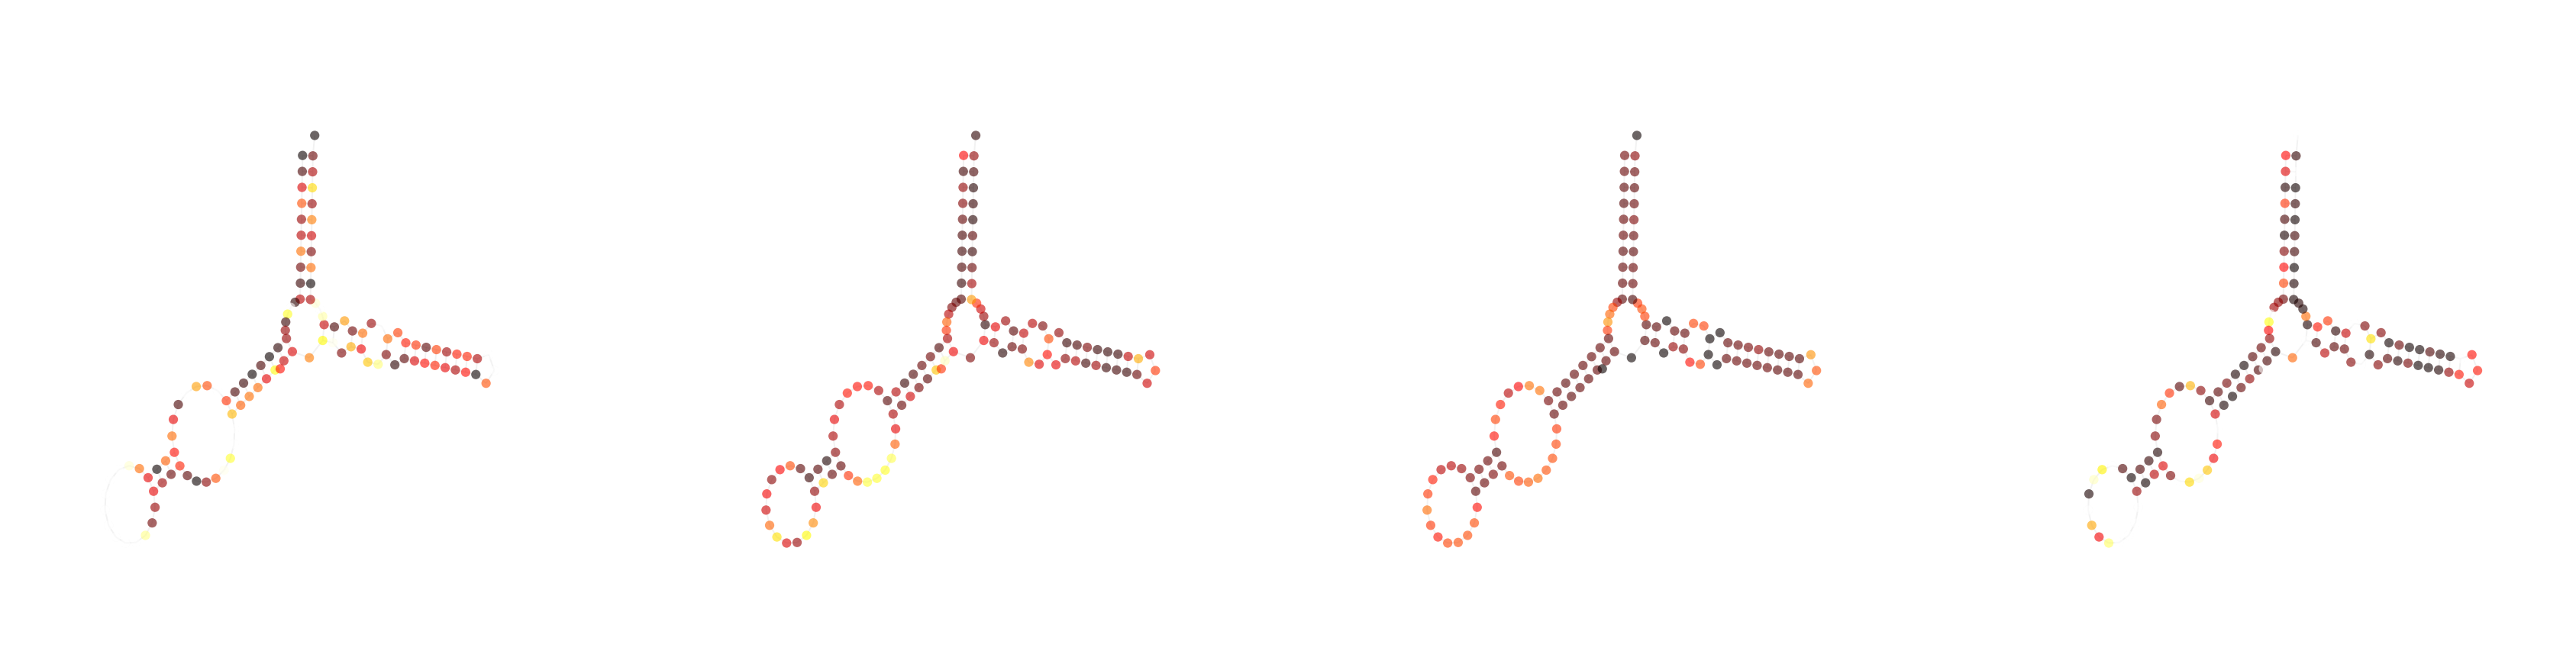

shaler: pearson: 0.212 spearman 0.267 variances: 0.255 0.039
hlmer: pearson: 0.088 spearman 0.353 variances: 0.255 62613.693
sukosd: pearson: 0.257 spearman 0.195 variances: 0.255 0.303
rna name ZGLY


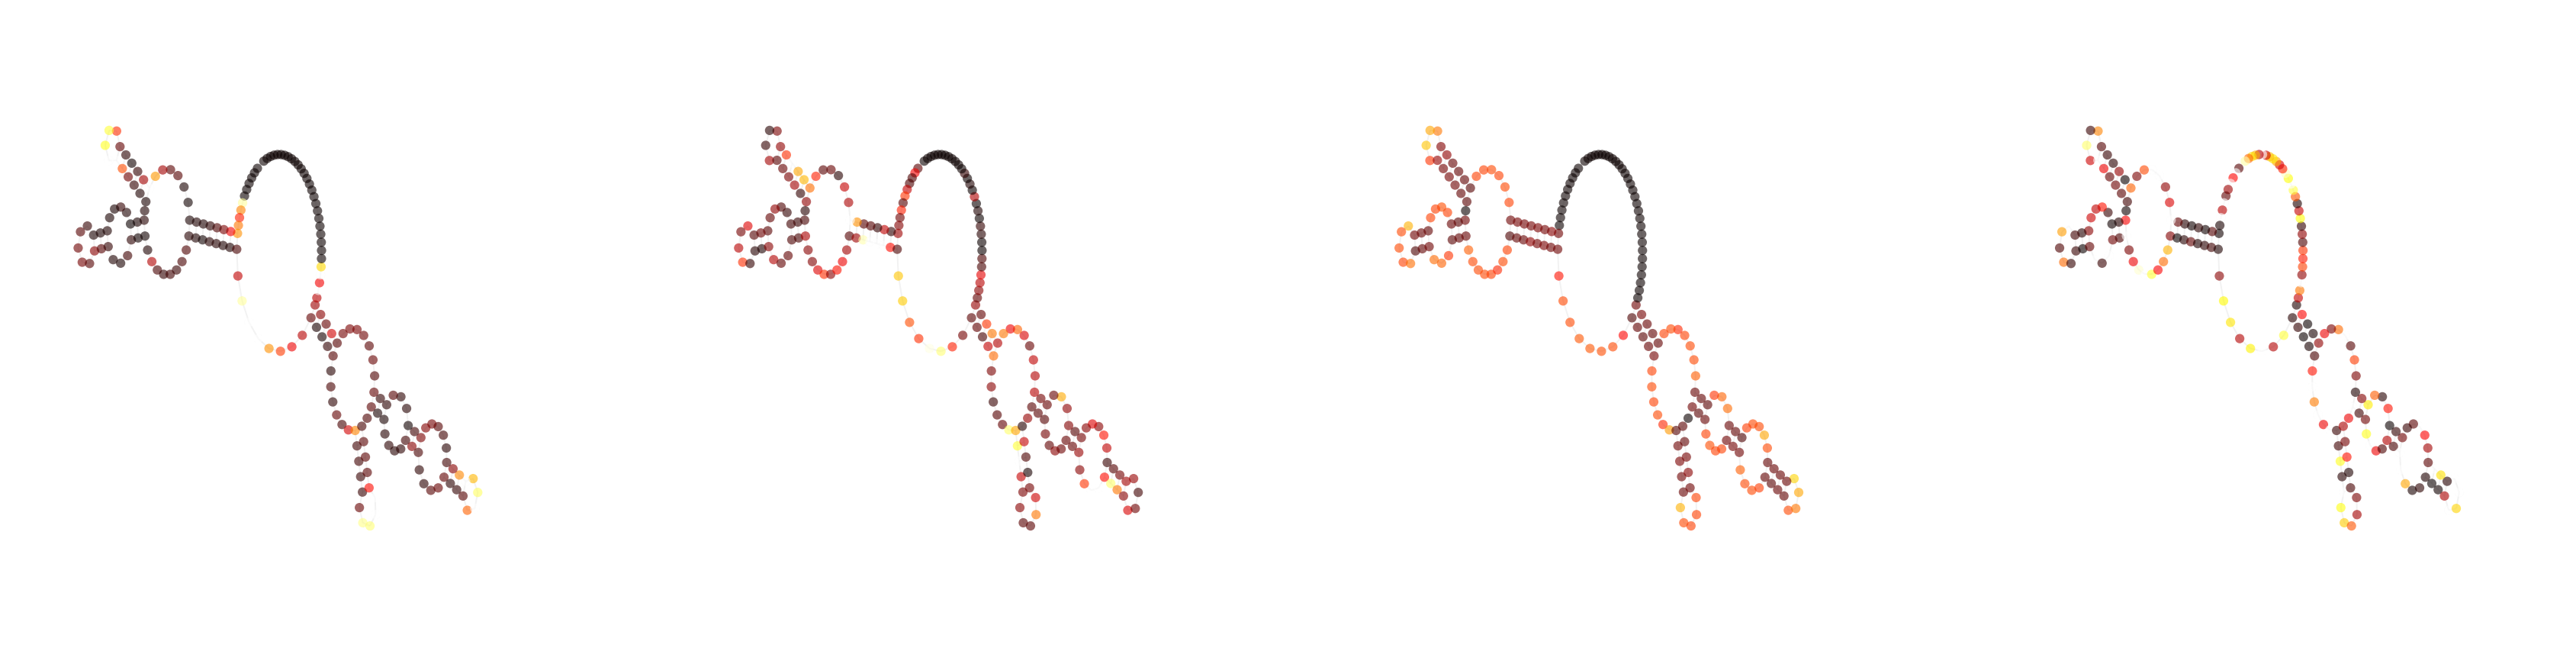

shaler: pearson: 0.008 spearman 0.095 variances: 0.133 0.075
hlmer: pearson: -0.219 spearman 0.117 variances: 0.133 61444.765
sukosd: pearson: 0.148 spearman 0.255 variances: 0.133 0.388
rna name MDLOOP


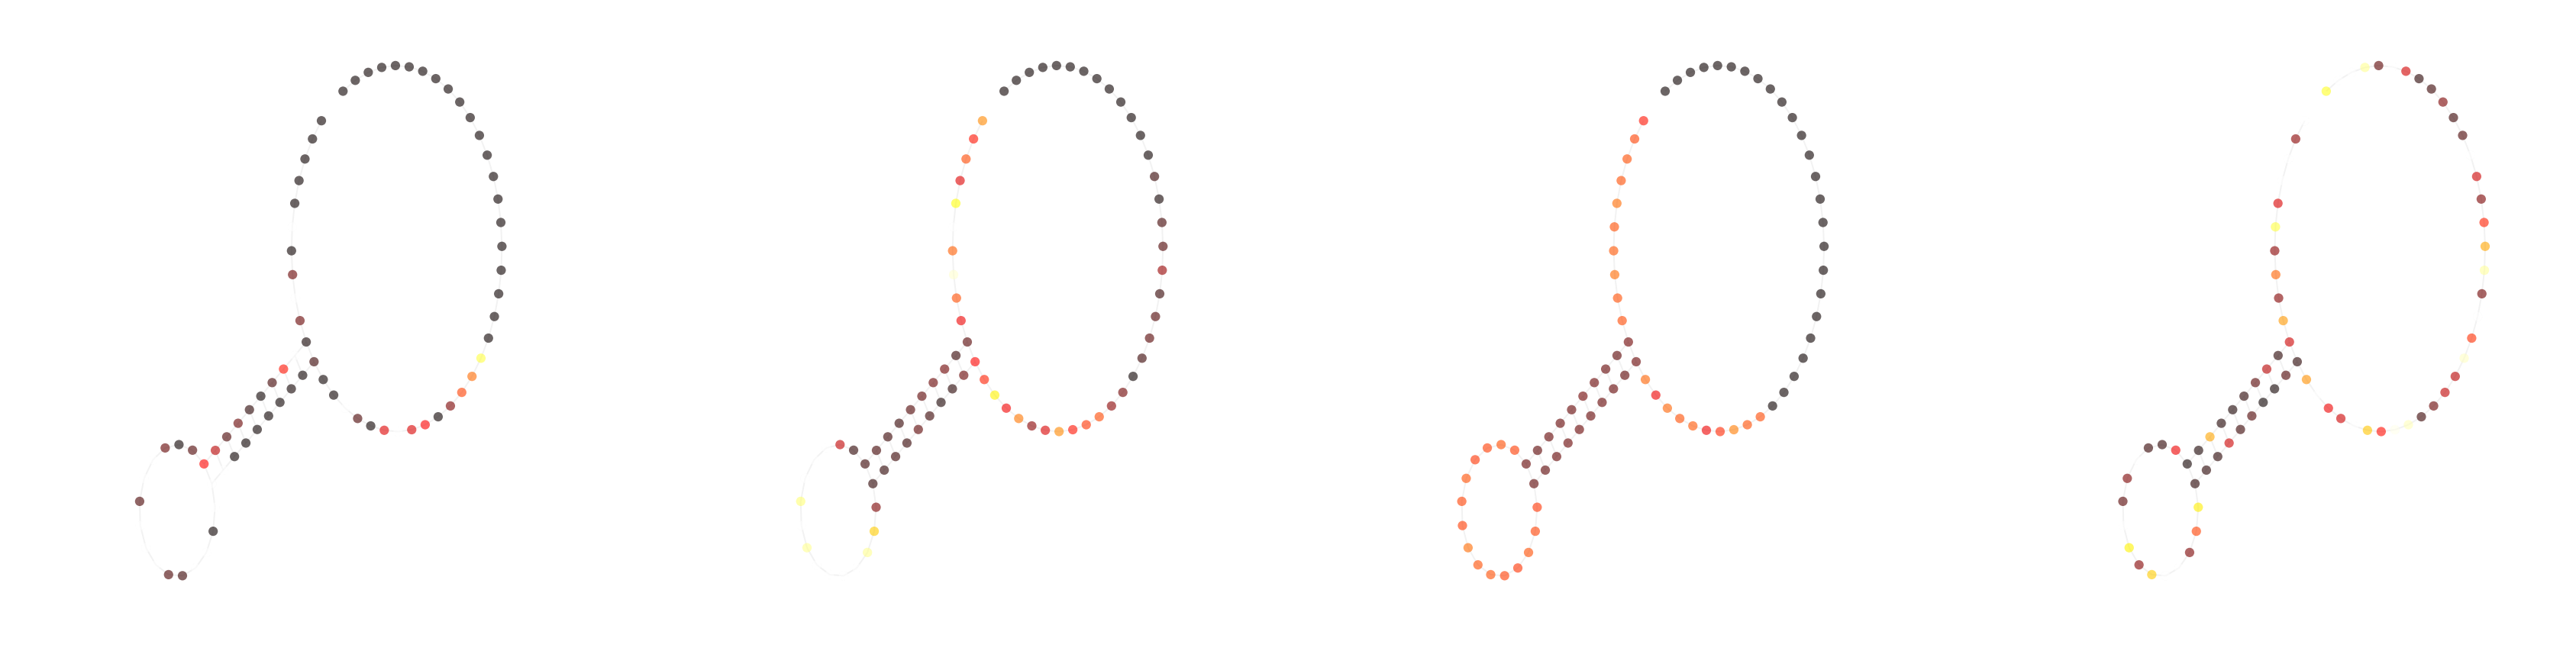

shaler: pearson: 0.379 spearman 0.217 variances: 0.649 0.255
hlmer: pearson: 0.029 spearman 0.024 variances: 0.649 68495.619
sukosd: pearson: 0.134 spearman 0.212 variances: 0.649 0.191
rna name R009


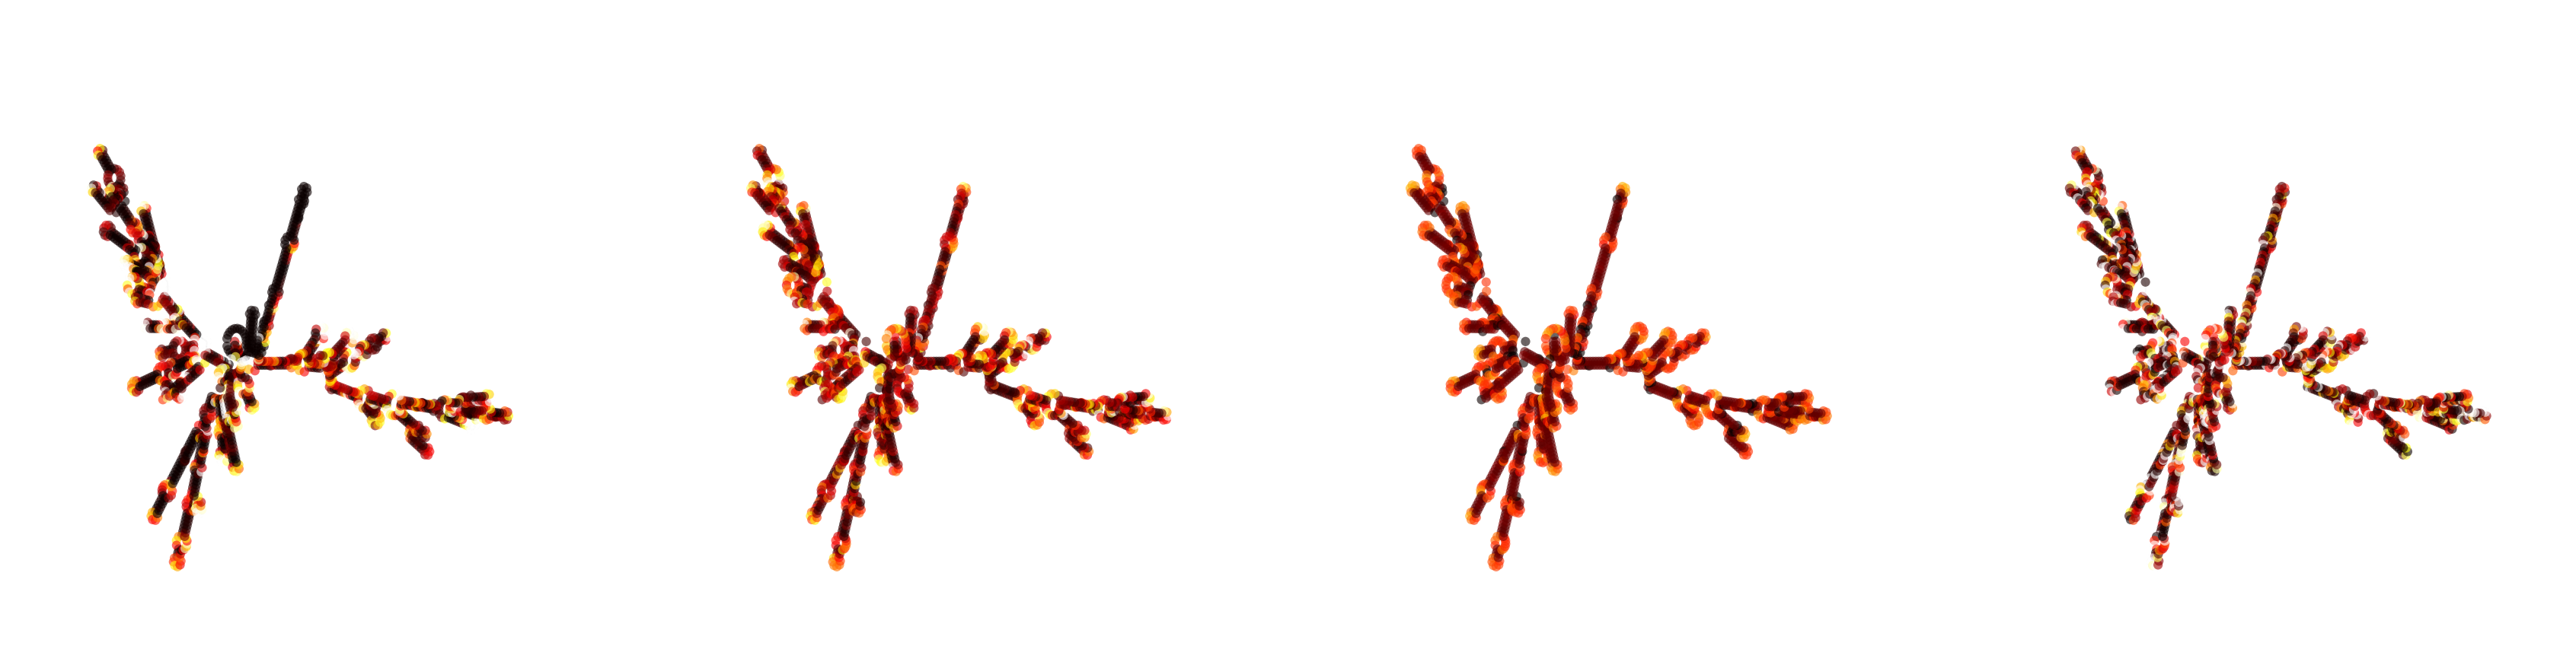

shaler: pearson: 0.372 spearman 0.470 variances: 0.211 0.068
hlmer: pearson: -0.083 spearman 0.468 variances: 0.211 44402.854
sukosd: pearson: 0.118 spearman 0.304 variances: 0.211 0.738
rna name 5srRNA


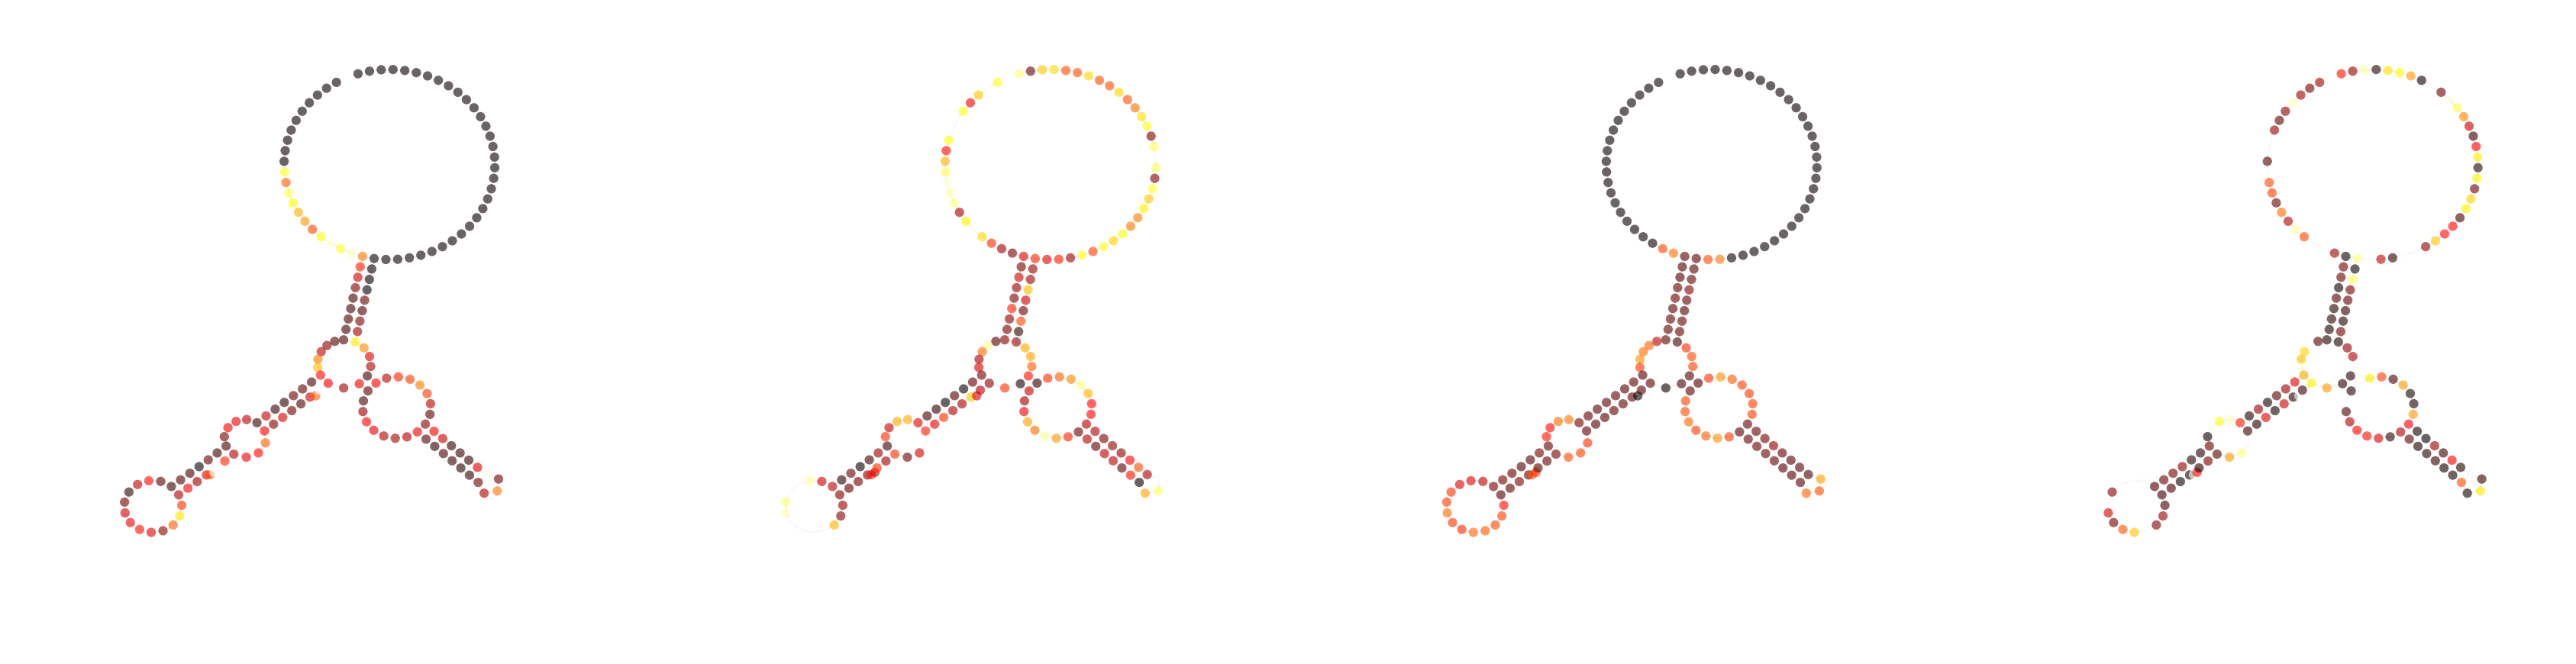

shaler: pearson: -0.021 spearman -0.063 variances: 0.073 0.115
hlmer: pearson: 0.246 spearman 0.450 variances: 0.073 209694.980
sukosd: pearson: 0.118 spearman 0.044 variances: 0.073 0.456
rna name TRP5


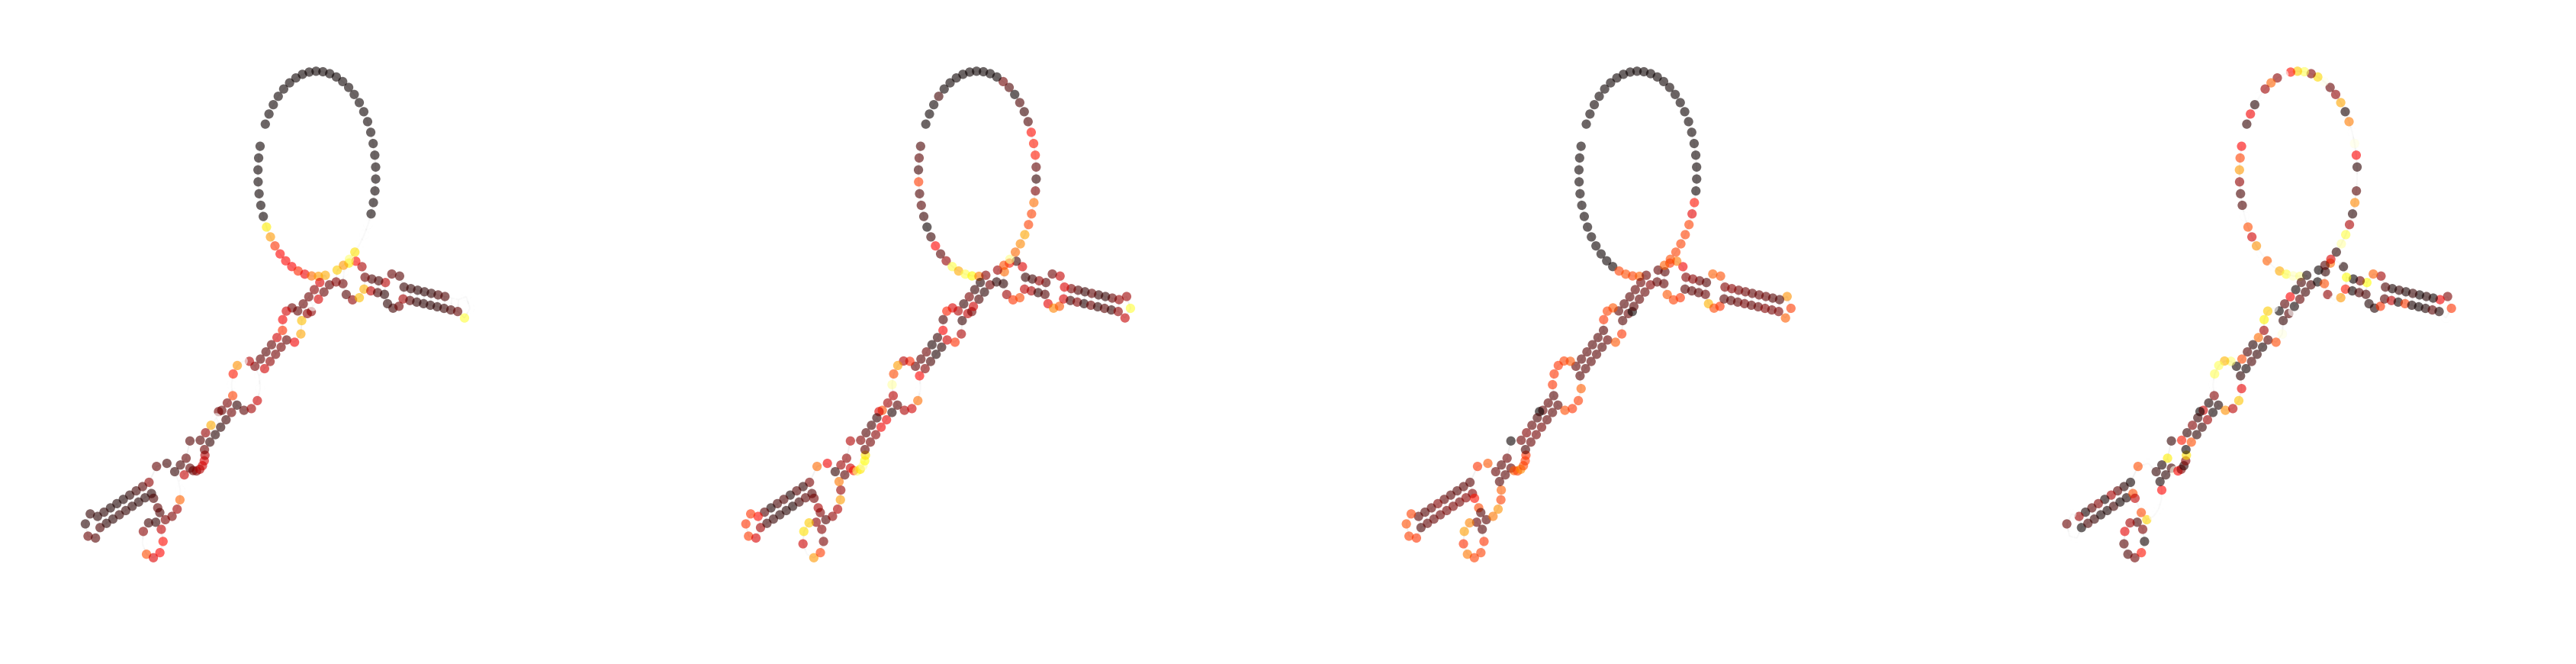

shaler: pearson: 0.319 spearman 0.419 variances: 0.296 0.055
hlmer: pearson: 0.000 spearman 0.084 variances: 0.296 50627.536
sukosd: pearson: 0.082 spearman 0.293 variances: 0.296 0.287


In [6]:
from graphlearn01.utils import draw
import numpy as np
from scipy.stats import pearsonr as pear
from scipy.stats import spearmanr as spear
import simushape  as ss


def annotate(g,shap):
    n=g.nodes()
    n.sort()
    for e,i in zip(n,shap):
        g.node[e]["importance"]= [i]
        g.node[e]["none"]= ''
    return g

def draw3(graph, shape_list):
    graphs=[annotate(graph.copy(),shape) for shape in shape_list  ]
    draw.graphlearn(graphs,size=15,layout="RNA",vertex_label='none',edge_alpha=0.05,vertex_size=150,vertex_border=False, scoretricks=True)
    

def mycorr(train, prediction):
    train = np.array(train)
    prediction = np.array(prediction)
    predict2, train2 = ss.mask(prediction,train)
    p =  pear(train2,predict2)[0]
    s =  spear(train2,predict2)[0]
    return "pearson: %.3f spearman %.3f variances: %.3f %.3f" % (p,s, train2.var(), predict2.var())


klmer2 = ss.read_react("data/klmer_2_prediction.react")
#klmer3 = ss.read_react("data/hlmer_3_prediction.react")
shaker = ss.read_react("data/shaker_prediction.react")
#sukust = ss.read_react("data/Sukosd_prediction.react")
RNA16 =  ss.read_react("data/RNA16.react")
allreacts = [RNA16, shaker,klmer2,sukust]
RNA16_complete = ss.get_all_data('data/RNA16.react','data/RNA16.dbn')# load includes sanity check;; name -> react,sequence,dotbracket



for e in RNA16_complete:
    print "rna name", e
    graph = ss.eden_rna.sequence_dotbracket_to_graph(RNA16_complete[e][1],RNA16_complete[e][2])
    graph.graph["structure"] = RNA16_complete[e][2]
    draw3(graph,[ react[e] for react in allreacts ])
    print "shaler:", mycorr(RNA16[e],shaker[e])
    print "hlmer:",mycorr(RNA16[e],klmer2[e])
    print "sukosd:",mycorr(RNA16[e],sukust[e])
  
    
    
    



---

In [7]:

from graphlearn01.utils import draw
import numpy as np
from scipy.stats import pearsonr as pear
from scipy.stats import spearmanr as spear
import simushape  as ss


RNA20 =  ss.read_react("data/RNA20.react")
allreacts = [RNA20]
RNA20_complete = ss.get_all_data('data/RNA20.react','data/RNA20.dbn')# load includes sanity check;; name -> react,sequence,dotbracket



for e in RNA20_complete:
    print "rna name", e
    graph = ss.eden_rna.sequence_dotbracket_to_graph(RNA20_complete[e][1],RNA20_complete[e][2])
    graph.graph["structure"] = RNA20_complete[e][2]
    draw3(graph,[ react[e] ])
  
  

data for '16S-Ecoli' is corrupted, ignoring...
data for '23S' is corrupted, ignoring...
data for '5srRNA' is corrupted, ignoring...
data for 'Adenine' is corrupted, ignoring...
data for 'Fluoride' is corrupted, ignoring...
data for 'Group1' is corrupted, ignoring...
data for 'Group1T' is corrupted, ignoring...
data for 'Group2' is corrupted, ignoring...
data for 'Hepatits' is corrupted, ignoring...
data for 'HIV' is corrupted, ignoring...
data for 'Lysine' is corrupted, ignoring...
data for 'M-Box' is corrupted, ignoring...
data for 'P546' is corrupted, ignoring...
data for 'Pre-Q1' is corrupted, ignoring...
data for 'RNAsep' is corrupted, ignoring...
data for 'SAMI' is corrupted, ignoring...
data for 'SingleReg' is corrupted, ignoring...
data for 'Telomerase' is corrupted, ignoring...
data for 'tRNA-asp' is corrupted, ignoring...
data for 'tRNA-phe' is corrupted, ignoring...
